Dataset Overview:
--------------------------------------------------
Number of rows: 891
Number of columns: 12
--------------------------------------------------

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 1

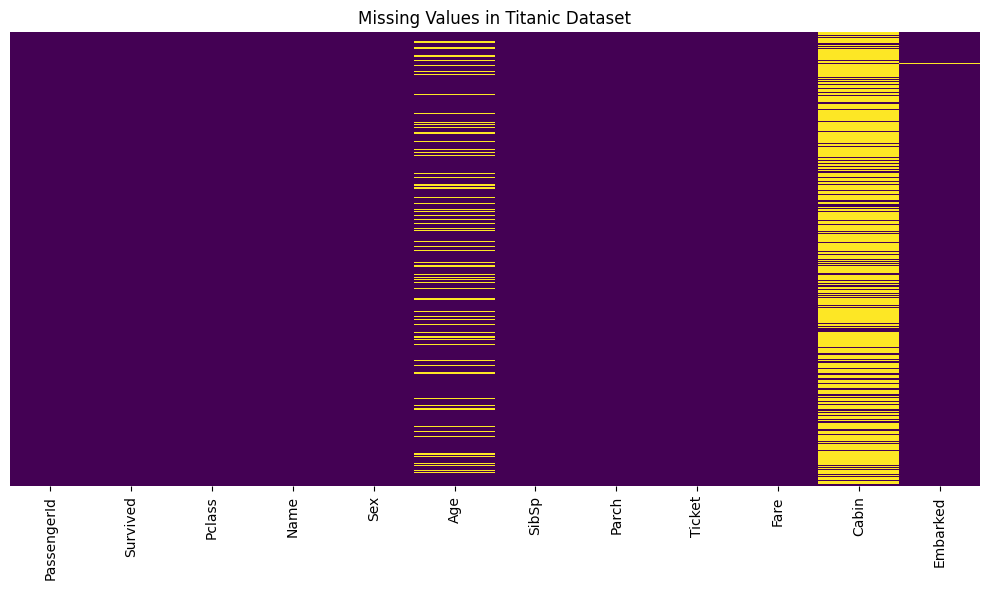


Age Column Statistics:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


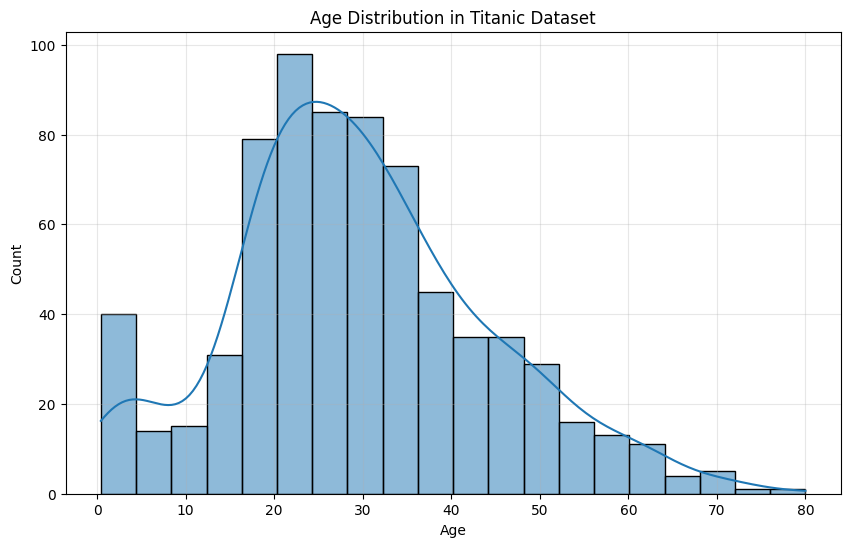

Loading Titanic dataset...

Dataset dimensions: 891 rows, 12 columns

Column names:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

=== DUPLICATE ROW ANALYSIS ===

Exact duplicates (all columns): 0
No exact duplicate rows found.

=== POTENTIAL PASSENGER DUPLICATES ===

Duplicates based on passenger identity (Name, Sex, Age, Pclass): 0
No duplicate passengers found based on identity fields.

=== NAME ANALYSIS ===
No repeated passenger names found.

=== SUMMARY ===
No significant duplication issues found in the dataset.
Missing Values per Column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Number of Duplicate Rows: 107

Basic Statistics:
           survived      pclas

In [2]:
# Part 1: Load a Dataset & Check Missing Values

# Task 1: Titanic Dataset
# - Load the dataset using Pandas.
# - Check for missing values in the 'Age' column.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


print("Dataset Overview:")
print("-" * 50)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("-" * 50)


print("\nFirst 5 rows of the dataset:")
print(df.head())


print("\nMissing values in each column:")
print(df.isnull().sum())


age_missing = df['Age'].isnull().sum()
age_missing_percentage = (age_missing / len(df)) * 100

print("\nMissing values in 'Age' column:")
print(f"Count: {age_missing}")
print(f"Percentage: {age_missing_percentage:.2f}%")


plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.tight_layout()
plt.show()


print("\nAge Column Statistics:")
print(df['Age'].describe())


plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution in Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()



# Part 2: Identify Duplicates & Inconsistencies
#correct one 
# Task 2: Duplicate Rows in Titanic Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print("Loading Titanic dataset...")
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


print(f"\nDataset dimensions: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nColumn names:")
print(df.columns.tolist())


print("\n=== DUPLICATE ROW ANALYSIS ===")


exact_duplicates = df.duplicated().sum()
print(f"\nExact duplicates (all columns): {exact_duplicates}")

if exact_duplicates > 0:
    print("\nShowing exact duplicate rows:")
    print(df[df.duplicated(keep='first')])
    
    
    all_duplicated = df[df.duplicated(keep=False)]
    print(f"\nAll rows involved in duplication (including first occurrences): {len(all_duplicated)}")
    print(all_duplicated)
else:
    print("No exact duplicate rows found.")






# Part 2: Identify Duplicates & Inconsistencies

# Task 2: Duplicate Rows in Titanic Dataset
# - Identify any duplicate rows in the dataset.
print("\n=== POTENTIAL PASSENGER DUPLICATES ===")


identity_columns = ['Name', 'Sex', 'Age', 'Pclass']
identity_duplicates = df.duplicated(subset=identity_columns).sum()

print(f"\nDuplicates based on passenger identity ({', '.join(identity_columns)}): {identity_duplicates}")

if identity_duplicates > 0:
    print("\nShowing identity-based duplicate rows:")
    print(df[df.duplicated(subset=identity_columns, keep='first')])
    
    # Show all rows involved in identity duplication
    all_id_duplicated = df[df.duplicated(subset=identity_columns, keep=False)]
    print(f"\nAll rows involved in identity duplication: {len(all_id_duplicated)}")
    print(all_id_duplicated)
else:
    print(f"No duplicate passengers found based on identity fields.")


print("\n=== NAME ANALYSIS ===")
name_counts = df['Name'].value_counts()
repeated_names = name_counts[name_counts > 1]

if len(repeated_names) > 0:
    print(f"\nFound {len(repeated_names)} names that appear multiple times:")
    
    for name, count in repeated_names.items():
        print(f"\n• Name '{name}' appears {count} times:")
        same_name_rows = df[df['Name'] == name]
        
        
        if same_name_rows['Age'].nunique() == 1 and same_name_rows['Sex'].nunique() == 1:
            print("  - Likely DUPLICATE ENTRIES (same name, age and sex)")
        else:
            print("  - Likely DIFFERENT people with the same name")
            
        
        print(same_name_rows)
else:
    print("No repeated passenger names found.")


if exact_duplicates > 0 or identity_duplicates > 0 or len(repeated_names) > 0:
    print("\n=== VISUALIZATION OF DUPLICATE PATTERNS ===")
    
    
    dup_status = pd.DataFrame({
        'Exact Duplicate': df.duplicated(keep=False),
        'Identity Duplicate': df.duplicated(subset=identity_columns, keep=False),
        'Name Duplicate': df['Name'].isin(repeated_names.index)
    })
    
    
    dup_counts = {
        'Exact': exact_duplicates,
        'Identity': identity_duplicates,
        'Name': sum(df['Name'].isin(repeated_names.index))
    }
    
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(dup_counts.keys()), y=list(dup_counts.values()))
    plt.title('Number of Potential Duplicates by Type')
    plt.ylabel('Count')
    plt.show()

print("\n=== SUMMARY ===")
if exact_duplicates > 0 or identity_duplicates > 0:
    print(f"Found {exact_duplicates} exact duplicate rows.")
    print(f"Found {identity_duplicates} potential passenger identity duplicates.")
    if len(repeated_names) > 0:
        print(f"Found {len(repeated_names)} names appearing multiple times.")
    print("\nRecommendation: Review and potentially remove duplicate records.")
else:
    print("No significant duplication issues found in the dataset.")









# Part 3: Generate a Data Quality Report

# Task 3: Titanic Dataset Overview
# - Create a simple report of missing values, duplicates, and some basic statistics for the Titanic dataset.
import pandas as pd


import seaborn as sns
df = sns.load_dataset('titanic')


print("Missing Values per Column:\n", df.isnull().sum())


print("\nNumber of Duplicate Rows:", df.duplicated().sum())

print("\nBasic Statistics:\n", df.describe(include='all'))




